In [12]:
import os
from tigertail import TimeFrame, TimeSeries, EventSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
bubbles_path = '../data/serprate-ai/bubbles.csv'
bubbles_df = pd.read_csv(bubbles_path).set_index('time')
bubbles_df.index = pd.to_datetime(bubbles_df.index, format='ISO8601')
bubbles_df.index.name = None
bubbles_df = bubbles_df.tz_localize(None)
bubbles_df

,similarity,template_id,ones
2019-05-07 16:37:35.302001,0.800337,0,1
2019-05-17 00:56:44.213000,0.801590,0,1
2019-05-18 11:45:45.948000,0.948577,0,1
2019-05-18 11:47:16.325000,0.962242,0,1
2019-05-18 11:47:54.450000,0.964003,0,1
...,...,...,...
2020-02-02 05:41:40.738000,0.811049,0,1
2020-02-02 08:03:25.875000,0.804105,0,1
2020-02-02 12:32:29.838000,0.810579,0,1
2020-02-02 22:43:12.641000,0.812358,0,1


/Users/cassandralem/Desktop/TigerTail/.conda/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<Axes: >

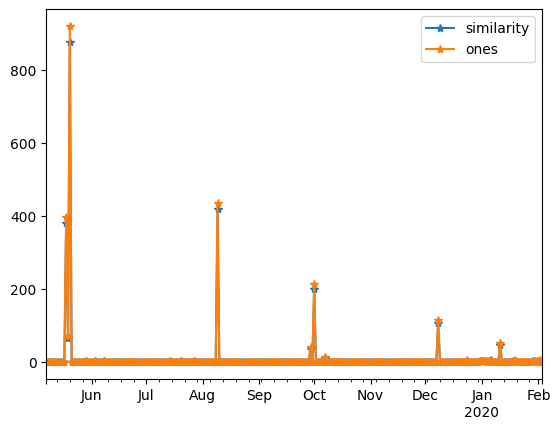

In [14]:
bubbles_es = EventSeries(bubbles_df.drop(columns=['template_id']), agg_func=np.sum)
bubbles_es.window('1D').plot(marker='*')

In [24]:
daily_precip_path = '../data/serprate-ai/daily_precipitation.csv'
daily_precip_df = pd.read_csv(daily_precip_path).set_index('system:time_start')
daily_precip_df.index = pd.to_datetime(daily_precip_df.index)
daily_precip_df.index.name = None
# daily_precip_df = daily_precip_df.tz_localize(None)
daily_precip_df

,total_precipitation_sum
2019-01-01,0.0
2019-01-02,0.0
2019-01-03,0.0
2019-01-04,0.0
2019-01-05,0.0
...,...
2020-02-25,0.0
2020-02-26,0.0
2020-02-27,0.0
2020-02-28,0.0


<Axes: >

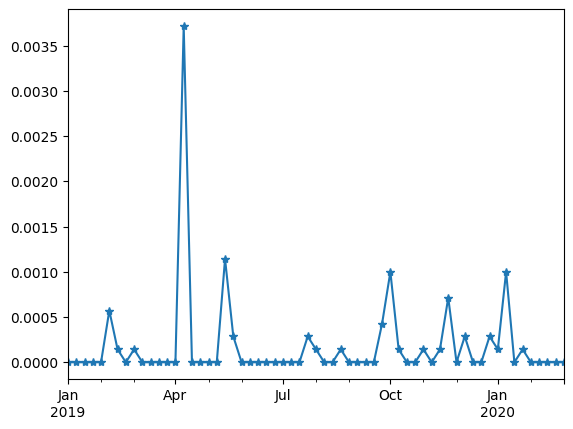

In [16]:
daily_precip_ts = TimeSeries(daily_precip_df, agg_func=np.mean)
daily_precip_ts.window('1W').plot(marker='*')

In [25]:
hourly_sp_path = '../data/serprate-ai/hourly_surface_pressure.csv'
hourly_sp_df = pd.read_csv(hourly_sp_path).set_index('datetime')
hourly_sp_df.index.name = None
hourly_sp_df.index = pd.to_datetime(hourly_sp_df.index)
hourly_sp_df = hourly_sp_df.tz_localize(None)
print(hourly_sp_df)

                     surface_pressure
2017-01-01 00:00:00         96536.368
2017-01-01 01:00:00         96553.223
2017-01-01 02:00:00         96599.012
2017-01-01 03:00:00         96674.992
2017-01-01 04:00:00         96747.476
...                               ...
2020-12-31 19:00:00         96888.352
2020-12-31 20:00:00         96892.005
2020-12-31 21:00:00         96861.655
2020-12-31 22:00:00         96875.097
2020-12-31 23:00:00         96866.614

[35064 rows x 1 columns]


<Axes: >

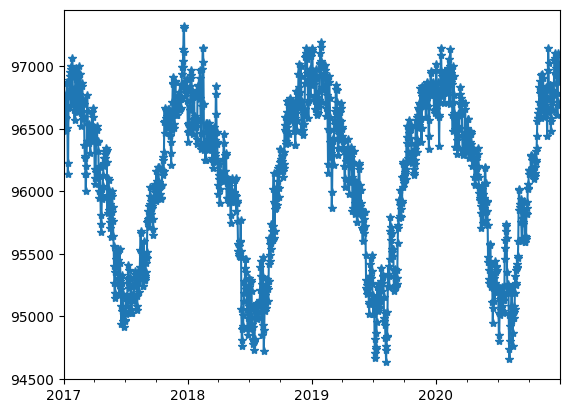

In [18]:
hourly_sp_ts = TimeSeries(hourly_sp_df, agg_func=np.mean)
hourly_sp_ts.window('1D').plot(marker='*')

In [19]:
bubbles_es.window('1D')

/Users/cassandralem/Desktop/TigerTail/.conda/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,similarity,ones
2019-05-07,0.800337,1.0
2019-05-08,0.000000,0.0
2019-05-09,0.000000,0.0
2019-05-10,0.000000,0.0
2019-05-11,0.000000,0.0
...,...,...
2020-01-30,2.454930,3.0
2020-01-31,0.829569,1.0
2020-02-01,2.445117,3.0
2020-02-02,4.051646,5.0


In [20]:
# create a TimeFrame object

tf = TimeFrame()
tf['bubbles_es'] = bubbles_es
tf['daily_precip_ts'] = daily_precip_ts
tf['hourly_sp_ts'] = hourly_sp_ts

In [21]:
tf_day_window = tf.window('1D')
tf_day_window


/Users/cassandralem/Desktop/TigerTail/.conda/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


similarity      total_precipitation_sum surface_pressure
           similarity ones                       0                1
2017-01-01        0.0  0.0                     0.0     96671.014625
2017-01-02        0.0  0.0                     0.0     96779.818708
2017-01-03        0.0  0.0                     0.0     96759.870500
2017-01-04        0.0  0.0                     0.0     96655.596208
2017-01-05        0.0  0.0                     0.0     96577.570625
...               ...  ...                     ...              ...
2020-12-27        0.0  0.0                     0.0     97110.352208
2020-12-28        0.0  0.0                     0.0     96998.292167
2020-12-29        0.0  0.0                     0.0     96908.148167
2020-12-30        0.0  0.0                     0.0     96925.027333
2020-12-31        0.0  0.0                     0.0     96878.317208

[1461 rows x 4 columns]

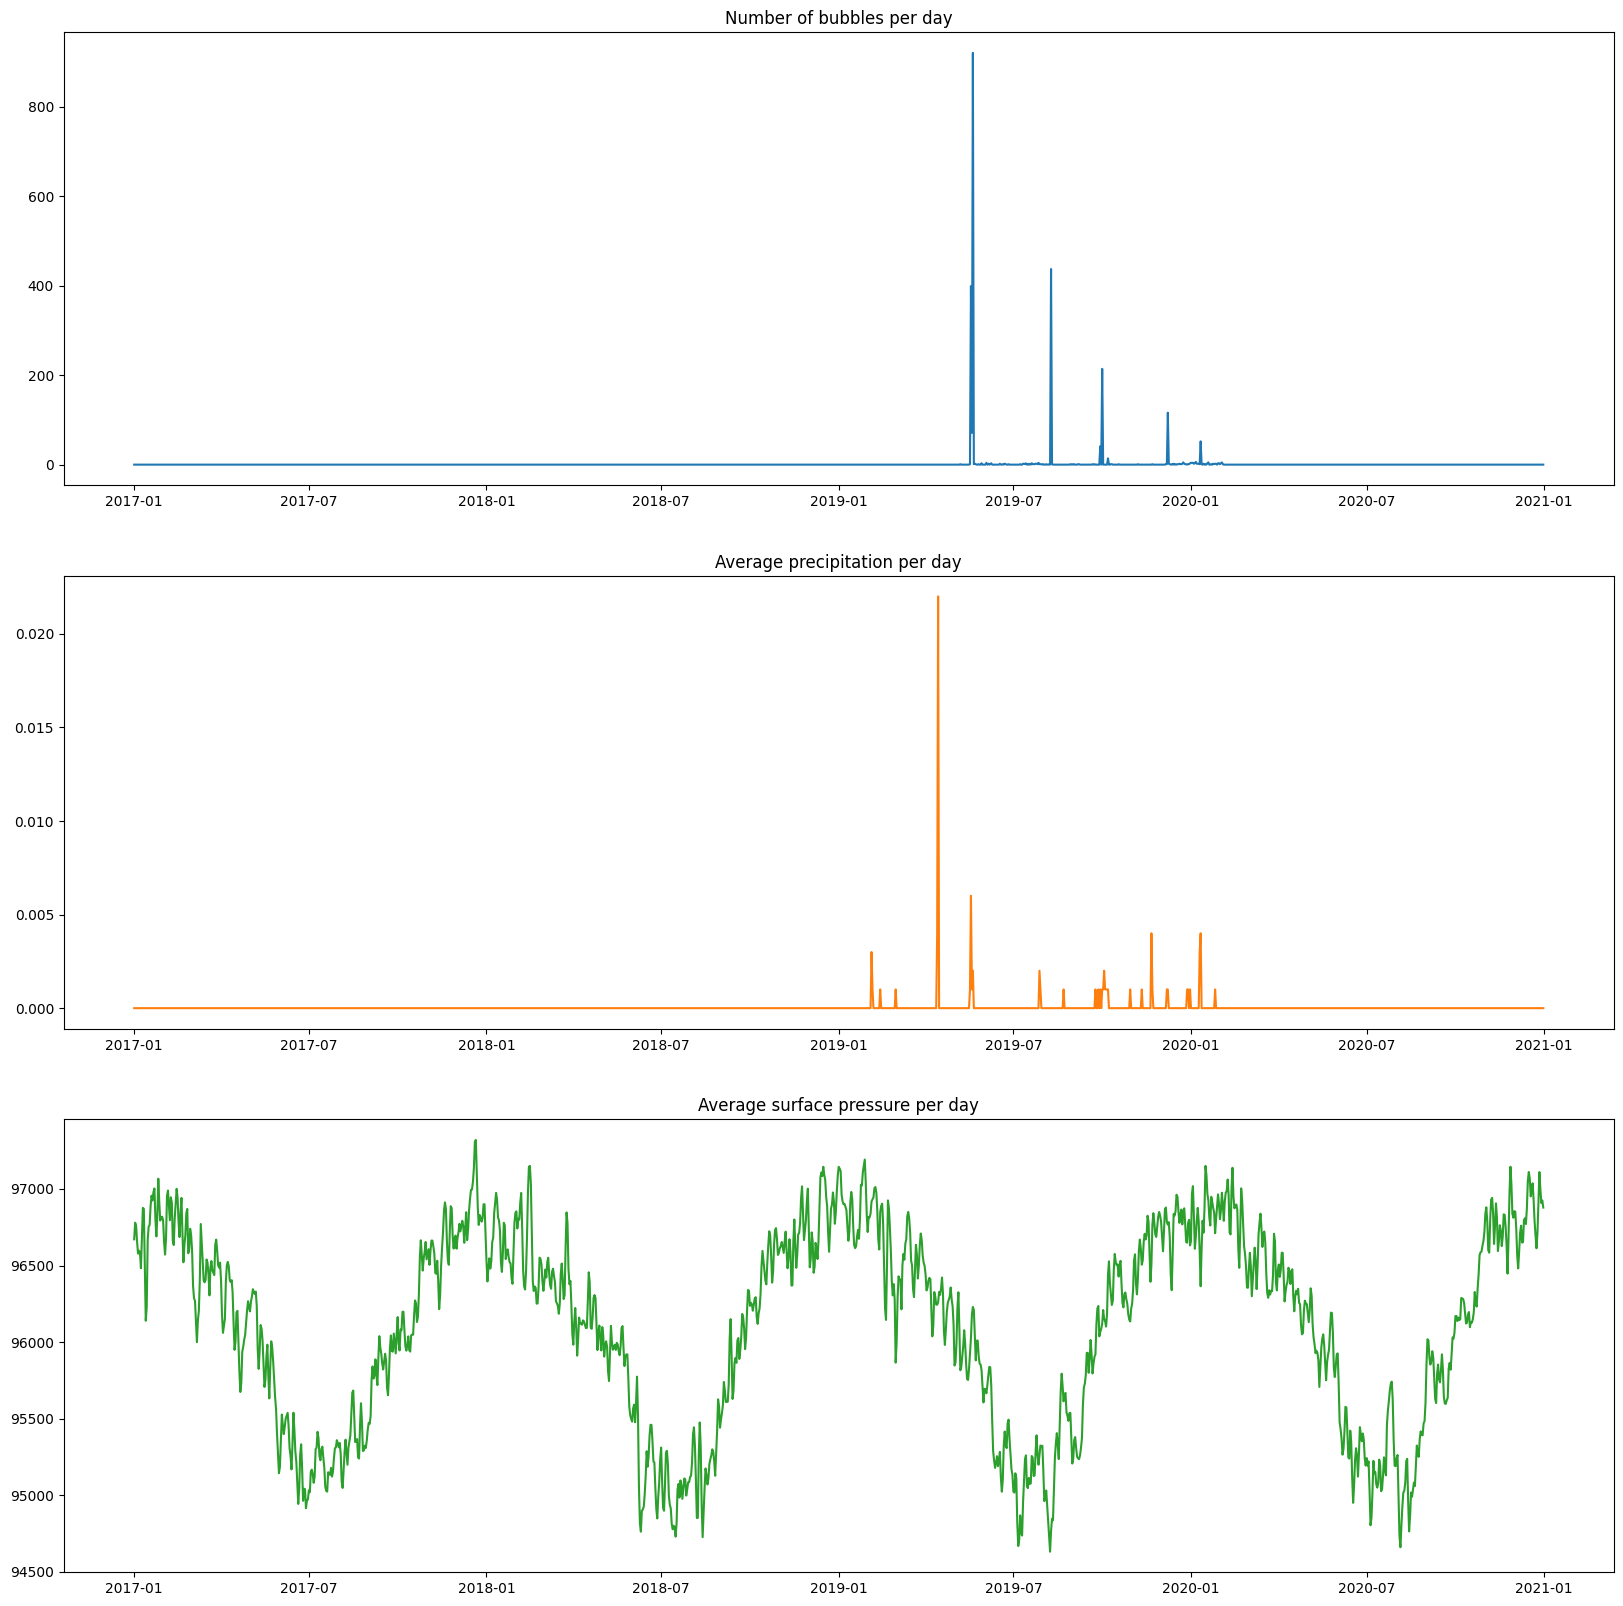

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
axs[0].plot(tf_day_window.index, tf_day_window['similarity']['ones'])
axs[0].set_title('Number of bubbles per day')
axs[1].plot(tf_day_window.index, tf_day_window['total_precipitation_sum'][0], 'tab:orange')
axs[1].set_title('Average precipitation per day')
axs[2].plot(tf_day_window.index, tf_day_window['surface_pressure'][1], 'tab:green')
axs[2].set_title('Average surface pressure per day')
plt.show()

Let's view part of this plot closer.

In [31]:
shorter_period_df = tf_day_window.loc['2019-01-01':'2020-02-28']
shorter_period_df

similarity      total_precipitation_sum surface_pressure
           similarity ones                       0                1
2019-01-01        0.0  0.0                     0.0     97144.518375
2019-01-02        0.0  0.0                     0.0     97132.137125
2019-01-03        0.0  0.0                     0.0     97115.655250
2019-01-04        0.0  0.0                     0.0     96960.913083
2019-01-05        0.0  0.0                     0.0     96918.480292
...               ...  ...                     ...              ...
2020-02-24        0.0  0.0                     0.0     96773.375458
2020-02-25        0.0  0.0                     0.0     96625.853250
2020-02-26        0.0  0.0                     0.0     96574.696375
2020-02-27        0.0  0.0                     0.0     96496.441875
2020-02-28        0.0  0.0                     0.0     96356.504083

[424 rows x 4 columns]

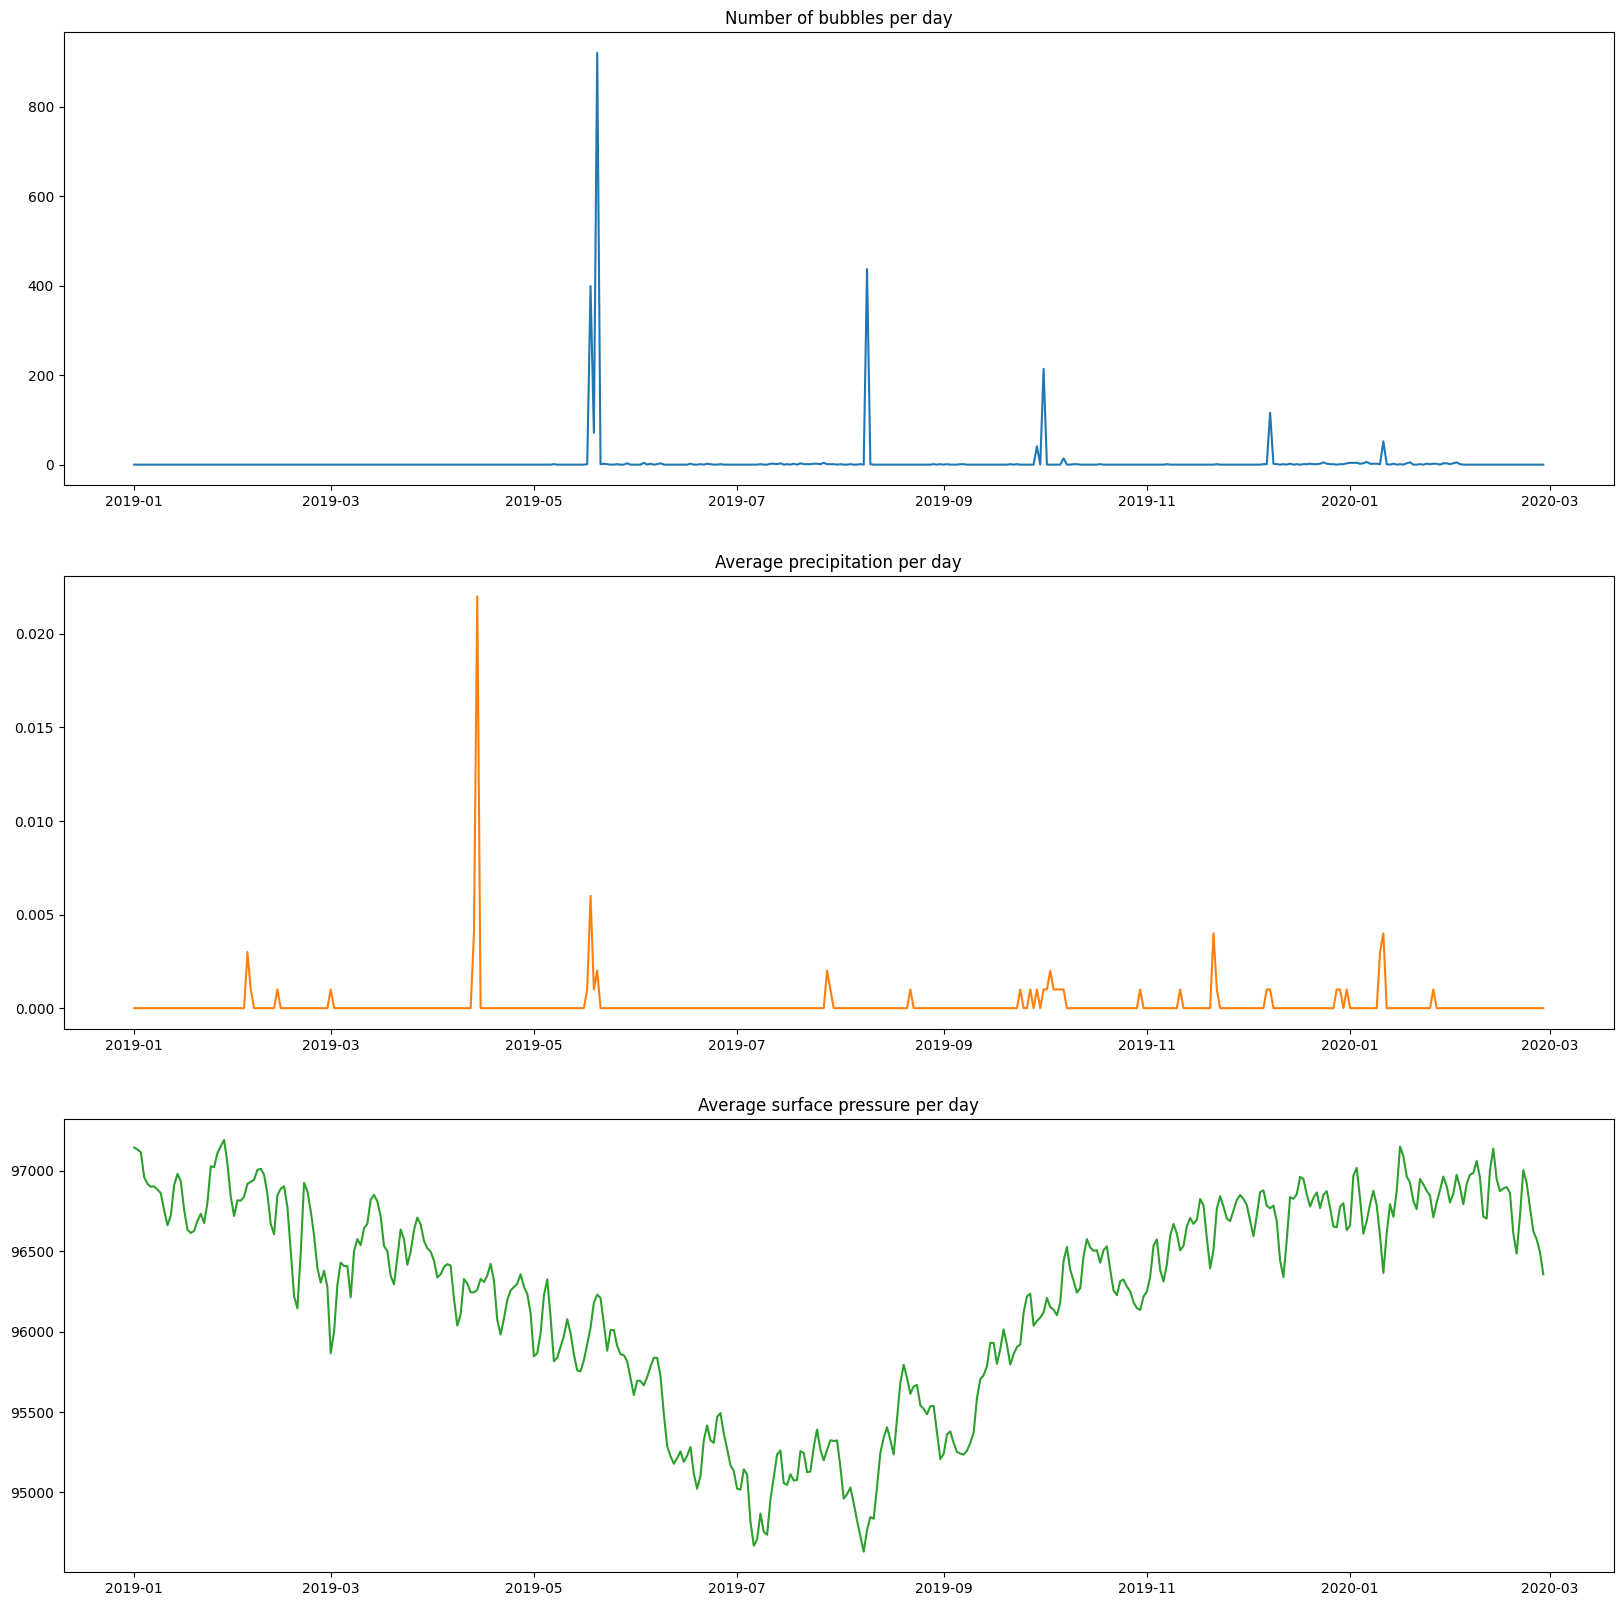

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
axs[0].plot(shorter_period_df.index, shorter_period_df['similarity']['ones'])
axs[0].set_title('Number of bubbles per day')
axs[1].plot(shorter_period_df.index, shorter_period_df['total_precipitation_sum'][0], 'tab:orange')
axs[1].set_title('Average precipitation per day')
axs[2].plot(shorter_period_df.index, shorter_period_df['surface_pressure'][1], 'tab:green')
axs[2].set_title('Average surface pressure per day')
plt.show()